#### Data

##### [rustfare](http://rstudio-pubs-static.s3.amazonaws.com/6921_bbba34e60cbc4bc8ad61b0a97599e417.html#/12)

In [25]:
library(rustfare)

In [26]:
lsf.str("package:rustfare")

GetOecd : function (measure = "public_expenditure_on_health")  
GetQog : function (country = "Russia", indicator = "undp_hdi")  
GetRosstat : function (indicator = "mortality_rate", level = "federal_district")  
GetRusGADM : function (level)  
IndicatorOecd : function (urli = "http://research.muuankarski.org/rustfare/data/IndicatorOecd.RData")  
IndicatorQog : function (urli = "http://www.qog.pol.gu.se/digitalAssets/1358/1358067_qog_tsd_csv_v6apr11.csv")  
IndicatorRosstat : function (urli = "http://research.muuankarski.org/rustfare/data/RosstatIndicatorData.RData")  
RosstatMapPlot : function (indicator = "average_percapita_income", vuosi = 2008, level = "federal_district")  
ScrapeData : function (indicator = "mortality_rate")  
ScrapeData_skip1 : function (indicator)  

[Data sources included](http://rstudio-pubs-static.s3.amazonaws.com/6921_bbba34e60cbc4bc8ad61b0a97599e417.html#/3)

-     Rosstat Regional Statistics:  Регионы России. Социально-экономические показатели
-    Quality of Governance:        The Quality of Governance Institute (University of Gothernburg)
-    Oecd:        Country statistical profile: Russian Federation
-    World Bank: World Development Indicators



In [28]:
ind  <-  IndicatorRosstat()

ERROR: Error in load(url(urli)): the input does not start with a magic number compatible with loading from a connection


In [29]:
dat <- GetRosstat("infant_mortality_rate",
                   "federal_district")


Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt



ERROR: Error in load(url("http://research.muuankarski.org/rustfare/data/RosstatIndicatorData.RData")): the input does not start with a magic number compatible with loading from a connection


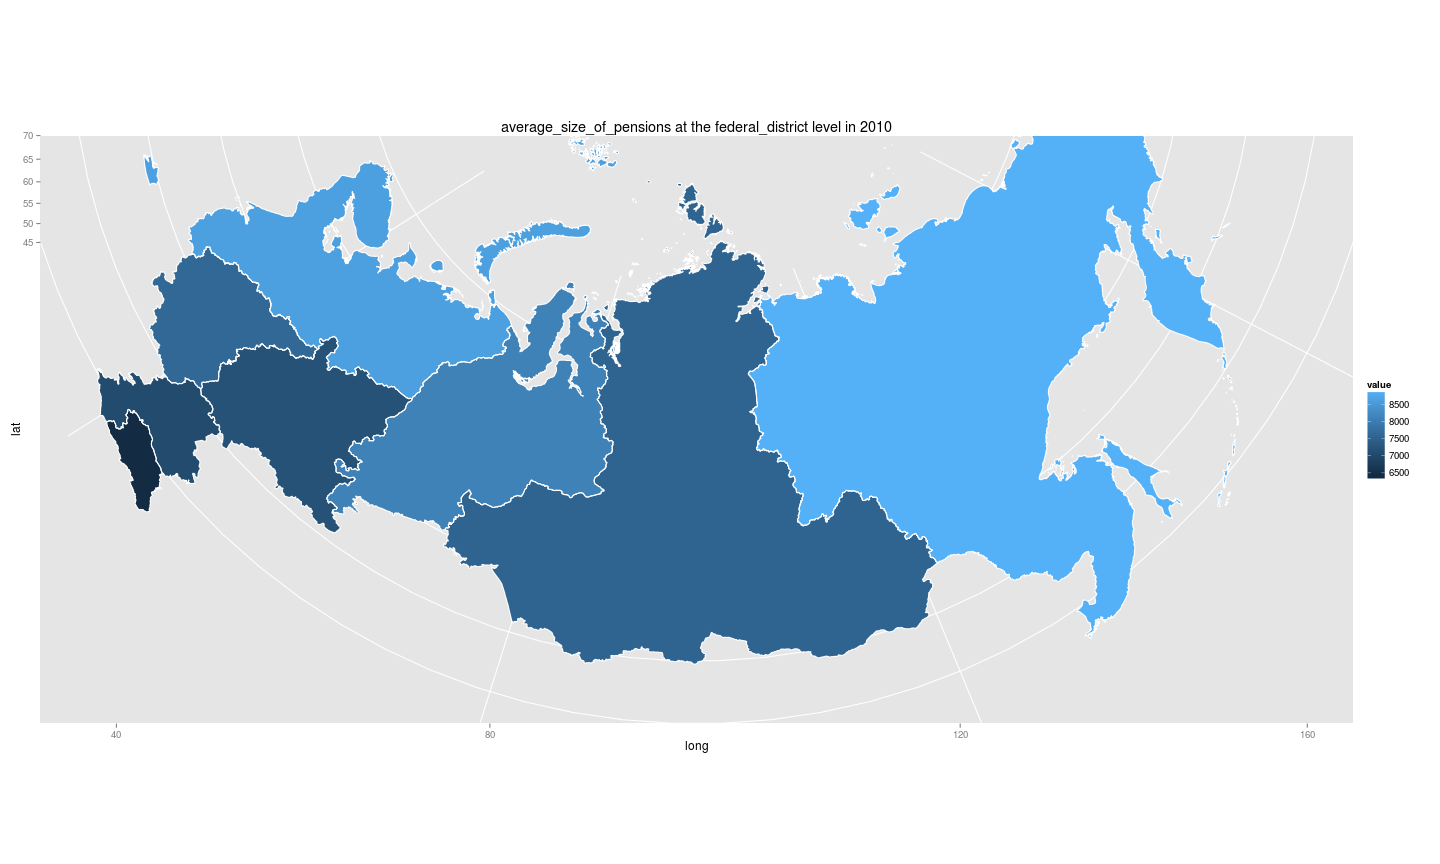

- [Colorize map](https://stackoverflow.com/questions/49723816/colorize-the-map-of-russia-depending-on-the-variable-in-r)


In [32]:
dat <- GetQog(country = c("Russia"))

In [ ]:
indicator=c("undp_hdi","fh_polity2")) # indicator(s)
library(ggplot2)
ggplot(dat, aes(x=year,y=value,color=cname)) + 
  geom_point() + geom_line() +
  geom_text(data = subset(dat, year == 2003), 
            aes(x=year,y=value,color=cname,label=cname)) +
  facet_wrap(~indicator, scales="free") +
  theme(legend.position="none")


In [37]:
RosstatMapPlot("infant_mortality_rate",2010,"region")


rgeos version: 0.5-1, (SVN revision 614)
 GEOS runtime version: 3.7.1-CAPI-1.11.1 
 Linking to sp version: 1.3-1 
 Polygon checking: TRUE 



ERROR: Error in load(url("http://research.muuankarski.org/rustfare/data/shape/ShapeRegion.RData")): the input does not start with a magic number compatible with loading from a connection


In [36]:
install.packages("rgeos")

Installing package into ‘/home/xenakas/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)


##### [rusquant documentation](http://rusquant.ru/docs/)

In [20]:
library(rusquant)
lsf.str("package:rusquant")

convert.time.series : function (fr, return.class)  
getAllDividends : function (allYears = FALSE)  
getOptionChain.Forts : function (Symbols, Exp, session = "MAIN", verbose = FALSE)  
getOrderbook : function (Symbols, return.class = "data.table", index.class = "Date", depth = 10, 
    adjust = FALSE, verbose = FALSE, auto.assign = TRUE, ...)  
getSymbols.Alor : function (Symbols, env, return.class = "xts", index.class = "Date", from = "2007-01-01", 
    to = Sys.Date(), adjust = FALSE, period = "day", ...)  
getSymbols.Finam : function (Symbols, env, return.class = "xts", index.class = "Date", from = "2007-01-01", 
    to = Sys.Date(), adjust = FALSE, period = "day", ...)  
getSymbols.Forts : function (Symbols, env, return.class = "xts", index.class = "Date", from = "2007-01-01", 
    to = Sys.Date(), adjust = FALSE, period = "day", ...)  
getSymbols.mfd : function (Symbols, env, return.class = "xts", index.class = "Date", from = "2007-01-01", 
    to = Sys.Date(), adjust = FALSE, peri

Всего доступны для загрузки 9 временных интервалов: 1min, 5min, 10min, 15min, 30min, hour, day, week, month.

[1] "SPFB.GOLD"

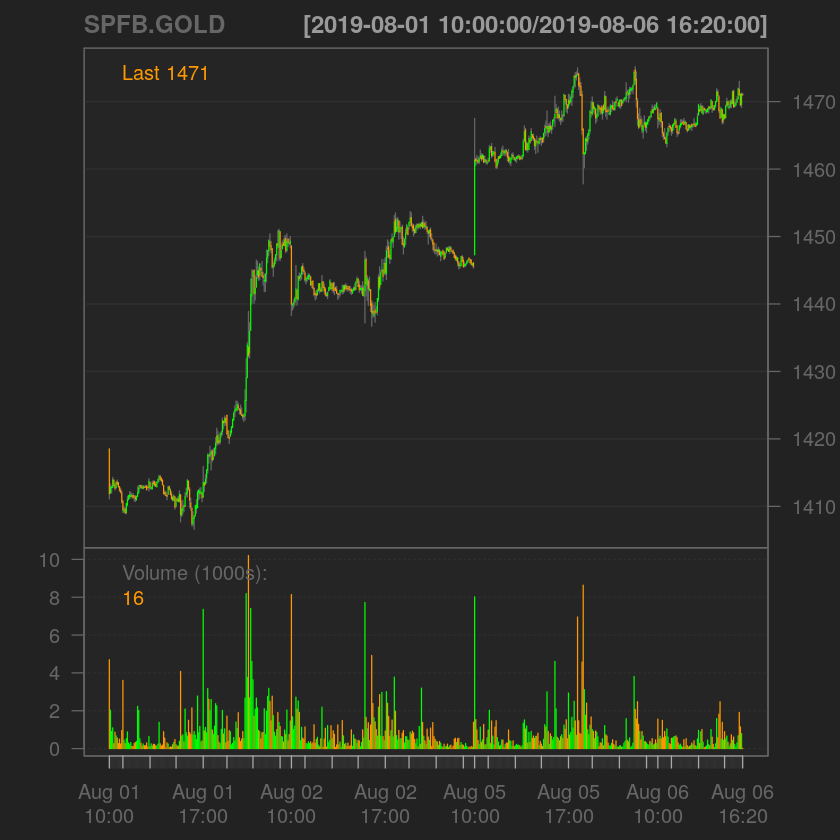

In [19]:
getSymbols("SPFB.GOLD", from=Sys.Date()-5, src="Finam", period="5min") #period="hour")
chartSeries(SPFB.GOLD)

#####  Quandl

In [10]:
install.packages("Quandl")
library("Quandl")

Installing package into ‘/home/xenakas/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)


In [41]:
Quandl.search("Russia")

LYXOR RUSSIA (DOW JONES RUSSIA GDR) LYXOR RUSSIA (DOW JONES RUSSIA GDR (0MQH) Unadjusted Stock Prices
Code: XLON/0MQH_UADJ
Desc:  <b>Ticker</b>: 0MQH <br> <br> <b>Exchange</b>: XLON <br> <br> Columns: <br> <br> Open,High,Low,Close,Volume are unadjusted and shown in EUR currency. <br> <br> Adjustment Factor shows the factor by which prices are adjusted on days which adjustments take place <br> <br> Adjustment Type is a number representing the type of adjustment. Refer to documentation for more information on these codes.
Freq: daily
Cols: Date | Open | High | Low | Close | Volume | Adjustment Factor | Adjustment Type

LYXOR RUSSIA (DOW JONES RUSSIA GDR) LYXOR RUSSIA (DOW JONES RUSSIA GDR (0MQH) Adjusted Stock Prices
Code: XLON/0MQH
Desc:  <b>Ticker</b>: 0MQH <br> <br> <b>Exchange</b>: XLON <br> <br> Columns: <br> <br> Open,High,Low,Close,Volume are adjusted and shown in EUR currency. <br> <br> Adjustment Factor shows the factor by which prices are adjusted on days which adjustments take

In [43]:
head(Quandl("RFSS/POP", type="raw"))

Date,Total,Urban,Rural,Percent Urban,Percent Rural
2014-01-01,143.7,106.6,37.1,74,26
2013-01-01,143.3,106.1,37.2,74,26
2012-01-01,143.0,105.7,37.3,74,26
2011-01-01,142.9,105.4,37.5,74,26
2010-01-01,142.8,105.0,37.8,74,26
2009-01-01,142.7,104.9,37.8,74,26


##### quantmod

- [A Guide on R quantmod Package](https://www.r-bloggers.com/a-guide-on-r-quantmod-package-how-to-get-started/)
- [Bookdown: tutorial](https://bookdown.org/kochiuyu/Technical-Analysis-with-R/downloading-data.html)
- [An Introduction into quantmod](http://statmath.wu.ac.at/~hornik/QFS1/quantmod-vignette.pdf)

In [11]:
install.packages("quantmod")
library("quantmod")

Installing package into ‘/home/xenakas/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)


In [55]:
getSymbols('AAPL')


Please see the Warning section of ‘?getSymbols.yahoo’ for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "AAPL"

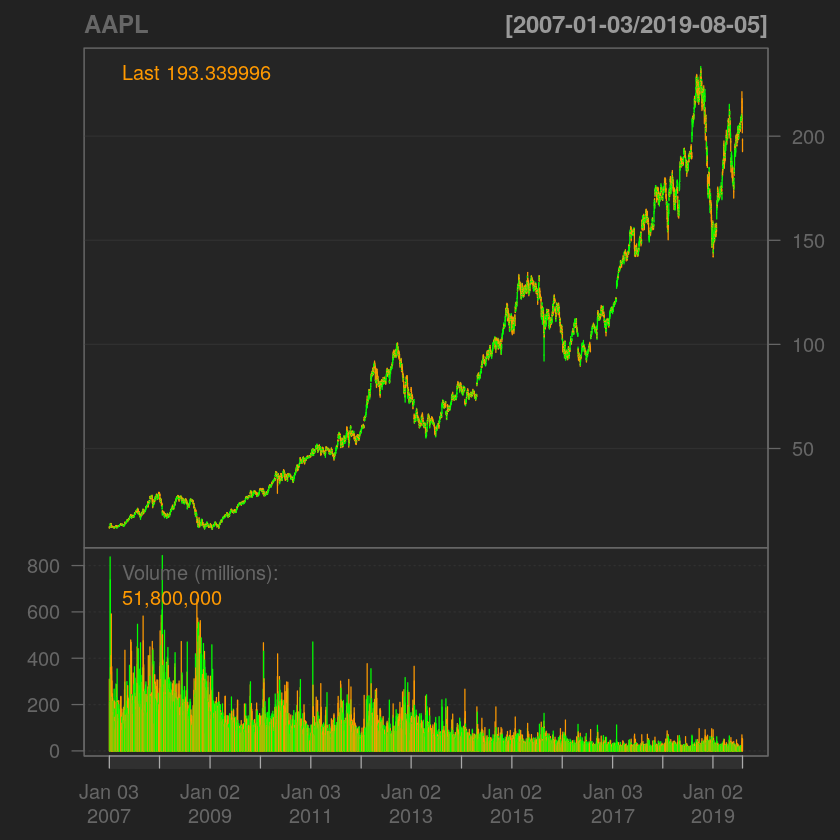

In [56]:
barChart(AAPL)

##### WDI

In [12]:
install.packages("WDI")
library("WDI")

Installing package into ‘/home/xenakas/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
also installing the dependency ‘RJSONIO’

